# Filling Area on Line Plots
Filling the area under the line plots allows for better analysis especially when filling it conditionally.

In [1]:
# import packages
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
# load data and seperate them
data=pd.read_csv(".\data\data05.csv",index_col=None)
ages = data['Age']
dev_salaries = data['All_Devs']
py_salaries = data['Python']
js_salaries = data['JavaScript']

### Simple Line Plot with multiple lines

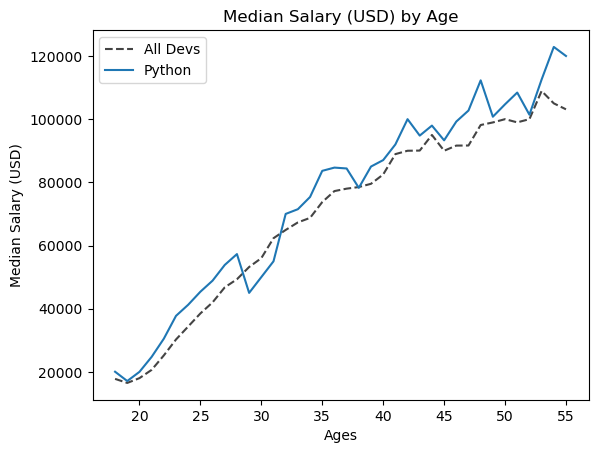

In [9]:
plt.plot(ages, dev_salaries, color='#444444',
         linestyle='--', label='All Devs')

plt.plot(ages, py_salaries, label='Python')

plt.legend()

plt.title('Median Salary (USD) by Age')
plt.xlabel('Ages')
plt.ylabel('Median Salary (USD)')

plt.show()

### Add fills to Line plot
To fill the area use the method `plt.fill_between(x,y1,alpha=0.1)`
Where x is the x-axis values, y1 are the line values and also provide values for alpha.

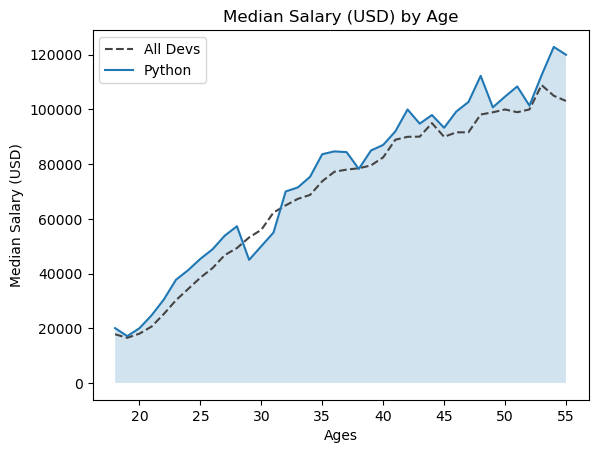

In [12]:
plt.plot(ages, dev_salaries, color='#444444',
         linestyle='--', label='All Devs')

plt.plot(ages, py_salaries, label='Python')

plt.fill_between(ages,py_salaries,alpha=0.2)
plt.legend()

plt.title('Median Salary (USD) by Age')
plt.xlabel('Ages')
plt.ylabel('Median Salary (USD)')

plt.show()

## Conditional Threshold

### Add a stopping point to fill.
By default fill starts from 0, to start at some other value like median_salary = 57287.<br>
To do this pass the point as `y2` argument to fill_between() method.

In [13]:
median_salary = 57287

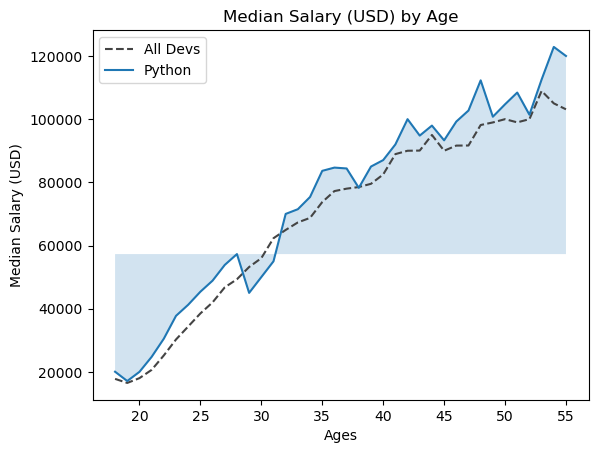

In [15]:
plt.plot(ages, dev_salaries, color='#444444',
         linestyle='--', label='All Devs')

plt.plot(ages, py_salaries, label='Python')

plt.fill_between(ages,py_salaries,median_salary,alpha=0.2)
plt.legend()

plt.title('Median Salary (USD) by Age')
plt.xlabel('Ages')
plt.ylabel('Median Salary (USD)')

plt.show()

This instead of filling from 0, it fills from where the python salary is more than the overall median salary.<br>
However this doesn't look best as the point before that is filled outside.

To fix this use the `where=` argument which specifies where to start filling and the `interpolate=True` argument which makes sure no x-axis values are clipped.

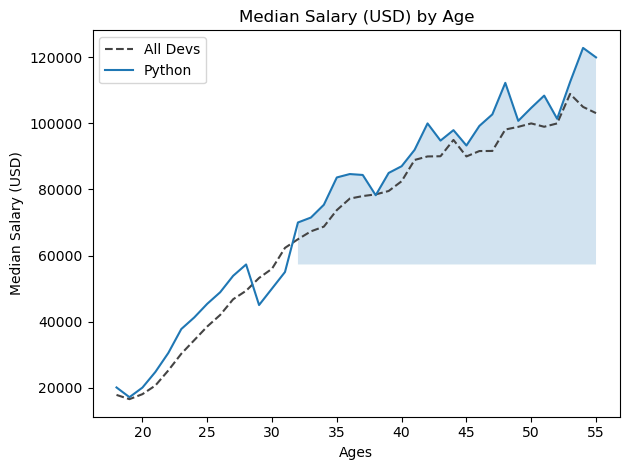

In [19]:
plt.plot(ages, dev_salaries, color='#444444',
         linestyle='--', label='All Devs')

plt.plot(ages, py_salaries, label='Python')

plt.fill_between(
    ages,
    py_salaries,
    median_salary,
    where=(py_salaries>median_salary),
    alpha=0.2)
plt.legend()

plt.title('Median Salary (USD) by Age')
plt.xlabel('Ages')
plt.ylabel('Median Salary (USD)')
plt.tight_layout()
plt.show()

This better demonstrates why using **'interpolate=True'** is necessary. As without that it clips some x-axis values from filling or more precisely speaking interpolate actually helps fill the gaps.

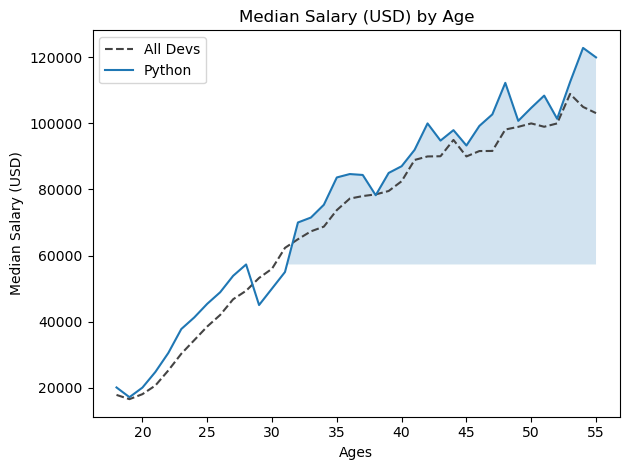

In [21]:
plt.plot(ages, dev_salaries, color='#444444',
         linestyle='--', label='All Devs')

plt.plot(ages, py_salaries, label='Python')

plt.fill_between(
    ages,
    py_salaries,
    median_salary,
    where=(py_salaries>median_salary),
    interpolate=True,
    alpha=0.2)
plt.legend()

plt.title('Median Salary (USD) by Age')
plt.xlabel('Ages')
plt.ylabel('Median Salary (USD)')
plt.tight_layout()
plt.show()

Here it fills from that point now if we want to fill up to that point with different color, we have to create another fill_between instance for that.

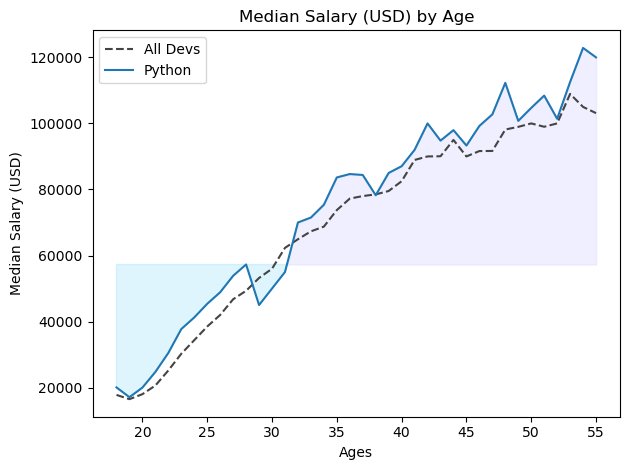

In [29]:
plt.plot(ages, dev_salaries, color='#444444',
         linestyle='--', label='All Devs')

plt.plot(ages, py_salaries, label='Python')

#fill above median
plt.fill_between(
    ages,
    py_salaries,
    median_salary,
    where=(py_salaries>median_salary),
    interpolate=True,
    alpha=0.3,
    color='#CCCCFF'
)

#fill below median
plt.fill_between(
    ages,
    py_salaries,
    median_salary,
    where=(py_salaries<median_salary),
    interpolate=True,
    alpha=0.2,
    color='#5BCEFA'
)
plt.legend()

plt.title('Median Salary (USD) by Age')
plt.xlabel('Ages')
plt.ylabel('Median Salary (USD)')
plt.tight_layout()
plt.show()

### Fill Between two plots
To fill instead of plotting a constant value like median salary, use the line values of the other line. In this case that is 'dev_salaries'

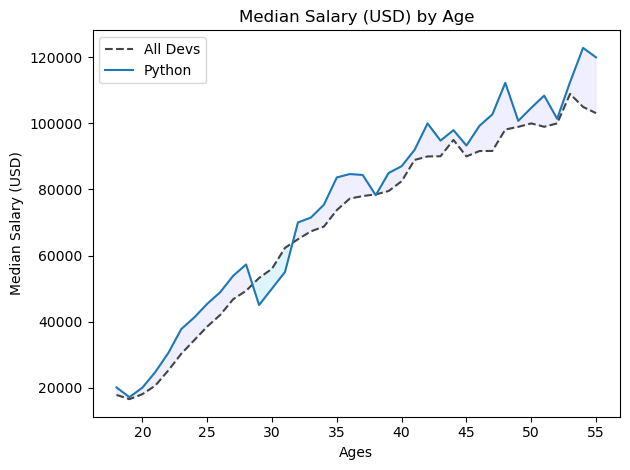

In [30]:
plt.plot(ages, dev_salaries, color='#444444',
         linestyle='--', label='All Devs')

plt.plot(ages, py_salaries, label='Python')

#fill above median
plt.fill_between(
    ages,
    py_salaries,
    dev_salaries,
    where=(py_salaries>dev_salaries),
    interpolate=True,
    alpha=0.3,
    color='#CCCCFF'
)

#fill below median
plt.fill_between(
    ages,
    py_salaries,
    dev_salaries,
    where=(py_salaries<dev_salaries),
    interpolate=True,
    alpha=0.2,
    color='#5BCEFA'
)
plt.legend()

plt.title('Median Salary (USD) by Age')
plt.xlabel('Ages')
plt.ylabel('Median Salary (USD)')
plt.tight_layout()
plt.show()

### Add fill to legend
Just having different color fill doesn't make much sense, to make it better and add lables. Use the `label` argument in each 'fill_between()' method.

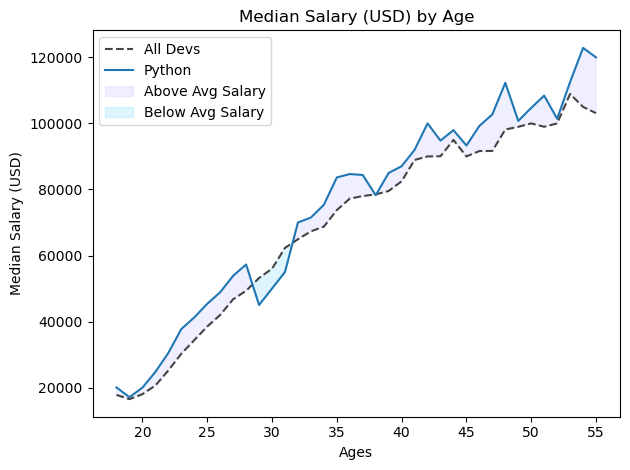

In [32]:
plt.plot(ages, dev_salaries, color='#444444',
         linestyle='--', label='All Devs')

plt.plot(ages, py_salaries, label='Python')

#fill above median
plt.fill_between(
    ages,
    py_salaries,
    dev_salaries,
    where=(py_salaries>dev_salaries),
    interpolate=True,
    alpha=0.3,
    color='#CCCCFF',
    label='Above Avg Salary'
)

#fill below median
plt.fill_between(
    ages,
    py_salaries,
    dev_salaries,
    where=(py_salaries<dev_salaries),
    interpolate=True,
    alpha=0.2,
    color='#5BCEFA',
    label='Below Avg Salary'
)
plt.legend()

plt.title('Median Salary (USD) by Age')
plt.xlabel('Ages')
plt.ylabel('Median Salary (USD)')
plt.tight_layout()
plt.show()

15-11-23<br>
-Simon Nadar